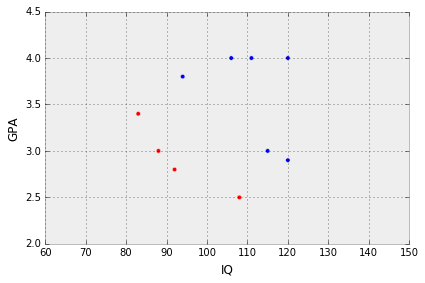

In [13]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
IQ = [88, 120, 111, 83, 94, 106, 108, 92, 115, 120]
GPA = [3.0, 2.9, 4.0, 3.4, 3.8, 4.0, 2.5, 2.8, 3.0, 4.0]
Hired = [0, 1, 1, 0, 1, 1, 0, 0, 1, 1]
colors = ["red", "blue"]

#plt.figure(figsize=(200,400))
plt.scatter(IQ, GPA, c=Hired, cmap=matplotlib.colors.ListedColormap(colors))
plt.style.use('bmh')
plt.axis([60,150,2.0,4.5])
plt.xlabel("IQ")
plt.ylabel("GPA")
plt.tight_layout()
plt.savefig("scatter.png")
plt.show()

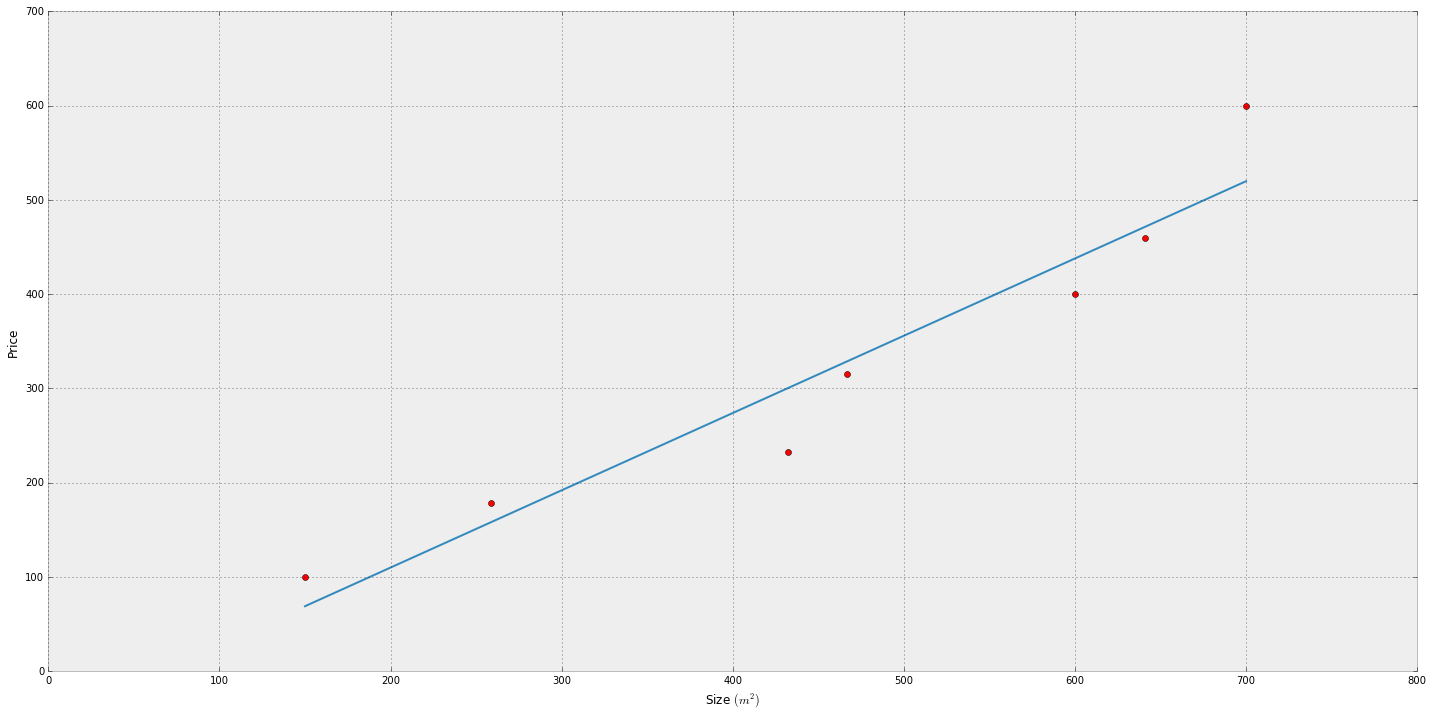

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

IQ = [88, 120, 111, 83, 94, 106, 108, 92, 115, 120]
GPA = [3.0, 2.9, 4.0, 3.4, 3.8, 4.0, 2.5, 2.8, 3.0, 4.0]

plt.figure(figsize=(20,10))
plt.plot(np.unique(a), np.poly1d(np.polyfit(a, b, 1))(np.unique(a)))
plt.plot(a,b,'ro')
plt.style.use('bmh')
plt.axis([60,150,2.0,4.5])
plt.xlabel(r"Size $(m^{2})$")
plt.ylabel("Price")
plt.tight_layout()
plt.savefig("wallpaper.png")
plt.show()

In [142]:
# Initializing the data in Python 
size = [641.0, 432.0, 467.0, 259.0] 
price = [460.0, 232.0, 315.0, 178.0]

# Initializing the function coefficients 
coefficient = [-0.25, 0.25] 

# Normalize value
def normalize(x):
    mean = sum(x)/float(len(x))
    minimum = min(x)
    maximum = max(x)
    return [(i-mean)/(maximum-minimum) for i in x]

# Compute the gradient of MSE 
def mse(x, y, deriv=False): 
    error = [] 
    for data, target in zip(x,y): 
        if deriv == True:
            error.append(2*((coefficient[0] + coefficient[1]*data) - target)/len(x))
        else:
            error.append((((coefficient[0] + coefficient[1]*data) - target)**2)/len(x))
    return error

# Print the error of the line
def test(x, y):
    error = sum(mse(x, y))
    return error
    
# Perform gradient descent 
def gradient_descent(x, y, epoch=1000): 
    lr = 0.01 # Learning rate 
    for i in range(epoch): 
        error_theta_0 = mse(x, y, deriv=True)
        error_theta_1 = [error_theta_0[i] * x[i] for i in range(len(x))]
        coefficient[0] -= lr*sum(error_theta_0) 
        coefficient[1] -= lr*sum(error_theta_1)
        if i % 100 == 0:
            print("Error at "+ str(i) +" epochs: " + str(test(x,y)))

Error at 0 epochs: 95679.70737917697
Error at 100 epochs: 8637.12391268404
Error at 200 epochs: 4705.53249958228
Error at 300 epochs: 3187.3153746545486
Error at 400 epochs: 2285.94844902192
Error at 500 epochs: 1742.1435634950478
Error at 600 epochs: 1413.9050135486725
Error at 700 epochs: 1215.7787540052796
Error at 800 epochs: 1096.1888080267715
Error at 900 epochs: 1024.003750987116


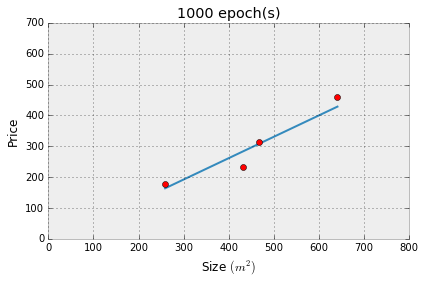

In [143]:
e = 1000
size_norm = normalize(size)
gradient_descent(size_norm, price, epoch=e)

new_x = [641.0, 432.0, 467.0, 259.0] 
new_x_norm = normalize(new_x)
new_y = [coefficient[0]+i*coefficient[1] for i in new_x_norm]

plt.plot(np.unique(new_x), np.poly1d(np.polyfit(new_x, new_y, 1))(np.unique(new_x)))
plt.plot(size,price,'ro')
plt.title(str(e)+" epoch(s)")
plt.style.use('bmh')
plt.axis([0,800,0,700])
plt.xlabel(r"Size $(m^{2})$")
plt.ylabel("Price")
plt.tight_layout()
plt.savefig("epoch_"+str(e)+".png")
plt.show()